# Importing Header Files

In [3]:
#import header files 
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sf
import os
import cv2
from tqdm import tqdm
import pickle
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from PIL import Image
import glob
from keras import regularizers
from keras.regularizers import l1

Using TensorFlow backend.


In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [12]:
#setting data directories for train, test and validate datset

DATADIR_train = "dsp_project_all_files/train/"
DATADIR_validate = "dsp_project_all_files/validate/"
DATADIR_test = "dsp_project_all_files/test/"

#set Categories in a list
CATEGORIES = ["Chinese_Yuan","Euro","Indian_Rupee","Old_Invalid_Currencies","UK_Pound","United_Arab_Emirates_Dirham","US_Dollar"]

#Set Image size which is used while resizing the images
IMG_SIZE = 148

# Exploratory Data Analysis and Data Preprocessing

In [13]:
#The create_training_data function will import all the images from the train folder and reshape them in the resolution of 148 X 148 
training_data = []
category_map = []

def create_training_data():
    
    for category in CATEGORIES:

        path = os.path.join(DATADIR_train,category) 
        class_num = CATEGORIES.index(category)  
       
        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                
                training_data.append([new_array, class_num])
                
               
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
            except Exception as e:
                print("general exception", e, os.path.join(path,img))
        
    
    print("Categories for Currency Classification are")
    for category in CATEGORIES:
        class_num = CATEGORIES.index(category)
        print(category,class_num)
    
create_training_data()

100%|██████████| 256/256 [00:05<00:00, 46.09it/s]

Categories for Currency Classification are
Chinese_Yuan 0
Euro 1
Indian_Rupee 2
Old_Invalid_Currencies 3
UK_Pound 4
United_Arab_Emirates_Dirham 5
US_Dollar 6


In [6]:
#The create_testing_data function will import all the images from the test folder and reshape them in the resolution of 148 X 148 
testing_data = []

def create_testing_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR_test,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                testing_data.append([new_array, class_num]) 
               # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
            except Exception as e:
                print("general exception", e, os.path.join(path,img))
                
    print("Categories for Currency Classification are")
    for category in CATEGORIES:
        class_num = CATEGORIES.index(category)
        print(category,class_num)
        
create_testing_data()

100%|██████████| 95/95 [00:04<00:00, 20.90it/s]

Categories for Currency Classification are
Chinese_Yuan 0
Euro 1
Indian_Rupee 2
Old_Invalid_Currencies 3
UK_Pound 4
United_Arab_Emirates_Dirham 5
US_Dollar 6


In [7]:
print(type(training_data))
print(len(training_data))
print(type(testing_data))
print(len(testing_data))

<class 'list'>
1666
<class 'list'>
609


In [8]:
#shuffling training data to avoid bias data 
import random
random.shuffle(training_data)

# Spliting data into train and test data frames

In [9]:
#spiting training data into x_train and y_train 
x_train = []
y_train = []

for features,label in training_data:
    x_train.append(features)
    y_train.append(label)

x_train_basic = np.array(x_train).reshape(-1, IMG_SIZE*IMG_SIZE)

print(x_train_basic.shape)

(1666, 21904)


In [10]:
#spiting testing data into x_train and y_train 
x_test = []
y_test = []

for features,label in testing_data:
    x_test.append(features)
    y_test.append(label)

x_test_basic = np.array(x_test).reshape(-1, IMG_SIZE*IMG_SIZE)

print(x_test_basic.shape)

(609, 21904)


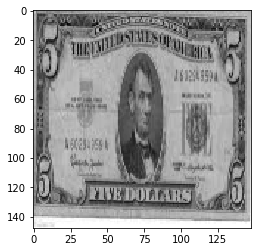

In [19]:
#displying images just to check the resolution
some_digit_train = x_train_basic[54]
some_digit_train = some_digit_train.reshape(148,148)
plt.imshow(some_digit_train,cmap="gray")
plt.show()

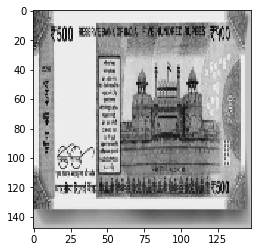

In [20]:
#displying images just to check the resolution
some_digit_test = x_test_basic[220]
some_digit_test = some_digit_test.reshape(148,148)
plt.imshow(some_digit_test,cmap="gray")
plt.show()

In [21]:
y_train = np.array(y_train)
y_test = np.array(y_test)
print(x_test_basic.shape, type(x_test_basic),len(x_test_basic))
print(x_train_basic.shape,type(x_train_basic), len(x_train_basic))

print(y_test.shape, type(y_test),len(y_test))
print(y_train.shape,type(y_train), len(y_train))


(609, 21904) <class 'numpy.ndarray'> 609
(1666, 21904) <class 'numpy.ndarray'> 1666
(609,) <class 'numpy.ndarray'> 609
(1666,) <class 'numpy.ndarray'> 1666


In [22]:
y_train = np.array(y_train)
print(y_train.shape)
print(type(y_train))

(1666,)
<class 'numpy.ndarray'>


In [23]:
#shuffling the x_train data
shuffle_index = np.random.permutation(1666)

In [24]:
x_train_basic = x_train_basic[shuffle_index]
y_train = y_train[shuffle_index]

# 1) SGD Classifier

In [25]:
#Using SGDClassifier to train data
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=50,learning_rate="adaptive",eta0=0.01)
type(sgd)

sklearn.linear_model._stochastic_gradient.SGDClassifier

In [26]:
sgd.fit(x_train_basic, y_train)
pred = sgd.predict(x_test_basic[1:20])

j=0
d = {}
l1=[]
for i in range(0,18):
    d[i] = pred[j]
    j=j+1

print(d)

{0: 0, 1: 0, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 5, 8: 0, 9: 0, 10: 0, 11: 0, 12: 2, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0}


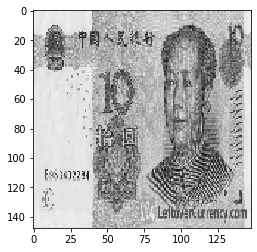

In [28]:
some_digit = x_test_basic[5]
some_digit_image = some_digit.reshape(148,148)
plt.imshow(some_digit_image,cmap="gray")
plt.show()

In [29]:
#applying 3 fold cross validation.
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, x_train_basic, y_train, cv=3, scoring="accuracy")

array([0.80395683, 0.81621622, 0.7981982 ])

In [30]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, x_train_basic, y_train, cv=3)
print(len(y_train_pred))

1666


# Model Evaluation

In [39]:
#Evaluating model using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred) 

array([[164,  34,  17,   0,  10,   7,  13],
       [ 10, 150,  15,   0,  10,   9,   6],
       [ 13,   7, 133,   4,   6,  15,  18],
       [  0,   0,   3, 262,   0,   0,   0],
       [ 16,  18,   8,   1, 176,   4,   5],
       [  4,   7,  15,   0,   5, 241,   4],
       [  7,   5,   8,   1,   6,  12, 217]], dtype=int64)

In [40]:
#Evaluating model using precision, recall and f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
print("Precision",precision_score(y_train, y_train_pred, average="macro")) 
print("Recall",recall_score(y_train, y_train_pred, average="macro")) 
print("F1_Score",f1_score(y_train, y_train_pred, average="macro"))

Precision 0.7970333590149039
Recall 0.7970589870449991
F1_Score 0.7961053669197395


# Evaluating model using testing data

In [41]:
#evaluating model using testing data 
from sklearn.model_selection import cross_val_predict
y_test_pred = cross_val_predict(sgd, x_test_basic, y_test, cv=3)
print(len(y_test_pred))

609


In [42]:
#evauating model based on testing data 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred) 


array([[63,  2,  3,  0,  7,  4,  4],
       [ 2, 66,  4,  0,  5,  2,  2],
       [ 2, 12, 58,  4,  6,  8,  3],
       [ 0,  0, 11, 69,  0,  0,  6],
       [ 5,  8,  8,  0, 50,  6,  5],
       [ 2,  1,  2,  1,  2, 79,  2],
       [12,  4, 10,  3,  5,  4, 57]], dtype=int64)

In [44]:
#Evaluating model using precision, recall and f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
print("Precision",precision_score(y_test, y_test_pred, average="macro")) 
print("Recall",recall_score(y_test, y_test_pred, average="macro")) 
print("F1_Score",f1_score(y_test, y_test_pred, average="macro"))

Precision 0.7282402952758371
Recall 0.7281755716808785
F1_Score 0.7256567080113532


# Random Forest Classifier

In [45]:
#training model using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train_basic, y_train, cv=3,
 method="predict_proba")

y_scores_forest = y_probas_forest[:, 1]

# Ensemble Learning Algorithm

In [46]:
#Building model using ensemble learning algorithm which combines results of SGD Classifier and Random Forest Classifier. 
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('rf', forest_clf), ('sgd', sgd)],
    voting='hard')
voting_clf.fit(x_train_basic, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [47]:
#Evaluting accuracy of all three models SGD Classifier, Random Forest Classifier and Ensemble Learning Algorithm
from sklearn.metrics import accuracy_score

for clf in (forest_clf, sgd, voting_clf):
    clf.fit(x_train_basic, y_train)
    y_pred = clf.predict(x_test_basic)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.7684729064039408
SGDClassifier 0.8045977011494253
VotingClassifier 0.7914614121510674


# Part 2 - Using CNN on the same Dataset 

In [15]:
#Configuring image generator in order to augument images to enhance dataset. 
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
#importing images from training folder 
train_generator = train_datagen.flow_from_directory(
    directory="dsp_project_all_files/train/",
    target_size=(148, 148),
    color_mode="grayscale",
    batch_size=128,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 1666 images belonging to 7 classes.


In [17]:
#importing images from validate folder 
valid_generator = valid_datagen.flow_from_directory(
    directory="dsp_project_all_files/validate",
    target_size=(148, 148),
    color_mode="grayscale",
    batch_size=128,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 370 images belonging to 7 classes.


In [18]:
#importing images from test folder 
test_generator = test_datagen.flow_from_directory(
    directory="dsp_project_all_files/test",
    target_size=(148, 148),
    color_mode="grayscale",
    batch_size=128,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 609 images belonging to 7 classes.


In [100]:
#configuring CNN architecture and compiling model by setting early stopping
from keras.callbacks import EarlyStopping

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), input_shape=(148,148,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())  #this converts our 3D feature maps to 1D feature vectors

model.add(Dense(256))

model.add(Dense(7))
model.add(Activation('softmax'))

model.summary()

opt = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])    #accuracy = loss and optimizer model algorithm

            

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 148, 148, 32)      320       
_________________________________________________________________
activation_93 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_94 (Activation)   (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 36, 36, 64)      

In [101]:
### from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=10,
        validation_data=valid_generator,
            callbacks=[earlystop])

Epoch 1/10
100/100 [==============================] - 457s 5s/step - loss: 1.8385 - accuracy: 0.2924 - val_loss: 1.4361 - val_accuracy: 0.5730
Epoch 2/10
100/100 [==============================] - 502s 5s/step - loss: 1.1116 - accuracy: 0.6143 - val_loss: 0.8831 - val_accuracy: 0.7189
Epoch 3/10
100/100 [==============================] - 521s 5s/step - loss: 0.7463 - accuracy: 0.7431 - val_loss: 0.6593 - val_accuracy: 0.7622
Epoch 4/10
100/100 [==============================] - 508s 5s/step - loss: 0.5804 - accuracy: 0.8085 - val_loss: 0.4762 - val_accuracy: 0.8216
Epoch 5/10
100/100 [==============================] - 513s 5s/step - loss: 0.4455 - accuracy: 0.8571 - val_loss: 0.4479 - val_accuracy: 0.8595
Epoch 6/10
100/100 [==============================] - 515s 5s/step - loss: 0.4911 - accuracy: 0.8554 - val_loss: 0.4147 - val_accuracy: 0.8541
Epoch 7/10
100/100 [==============================] - 519s 5s/step - loss: 0.3055 - accuracy: 0.9116 - val_loss: 0.3236 - val_accuracy: 0.8919

In [102]:
test_loss, test_acc = model.evaluate_generator(test_generator)

print(test_acc)

0.8128078579902649


In [103]:
predictions = model.predict_generator(generator=test_generator)

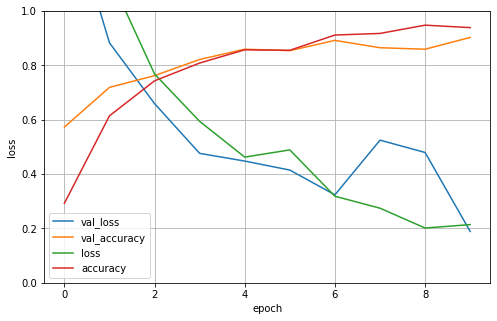

In [110]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.ylabel('loss')
plt.xlabel('epoch')# set the vertical range to [0-1]
plt.show()

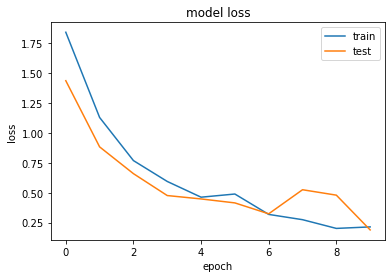

In [111]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [105]:
model.save('cnn_currency.h5')

In [106]:
print(test_acc)

0.8128078579902649
